# Linear Regression

We will use the following dataset to train and test our linear regression model 
https://www.kaggle.com/datasets/andonians/random-linear-regression

In [4]:
import numpy as np, matplotlib.pyplot as plt, csv

x=[]
y=[]

with open('train.csv', mode='r') as file:
    csvFile = csv.reader(file)
    
    try:
        next(csvFile)  # Skip the header
    except StopIteration:
        pass # Handle empty file
    
    for line in csvFile:
        # --- THIS IS THE FIX ---
        # Check if the row has at least 2 columns
        if len(line) >= 2:
            try:
                x.append(float(line[0])) 
                y.append(float(line[1]))
            except ValueError:
                # Optional: Handle cases where the data isn't a number
                print(f"Skipping row: cannot convert '{line[0]}' or '{line[1]}' to float")
        else:
            # Optional: Tell you about the bad row
            print(f"Skipping malformed row: {line}")


Skipping malformed row: ['3530.15736917']


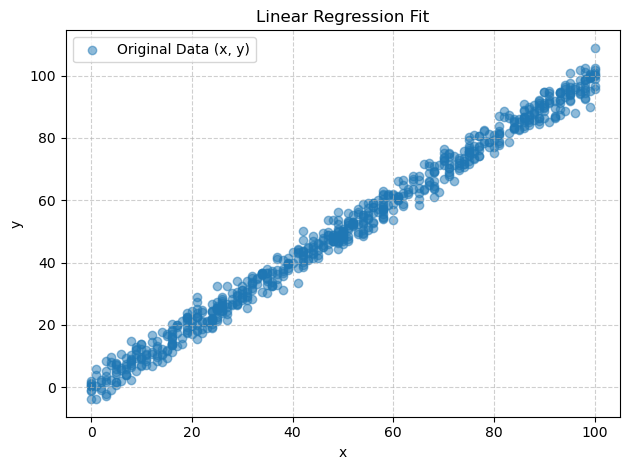

In [14]:
plt.scatter(x, y, alpha=0.5, label='Original Data (x, y)')

# 3. Add labels and title
plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()

0.0
w is 0.9988297525302393
b is 0.014658112104850598


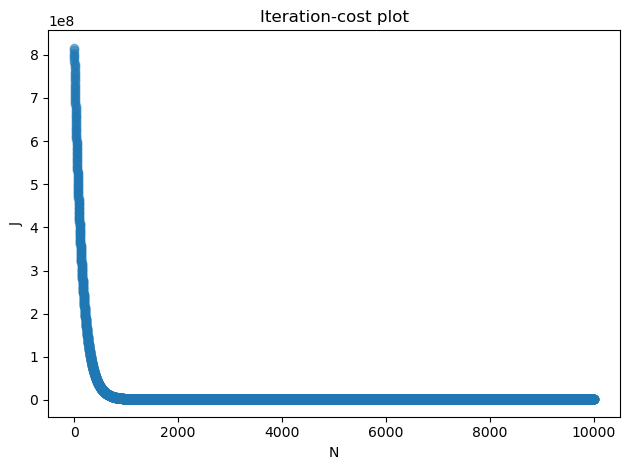

In [13]:
#Our model is f(x)=wx+b. To compute w and b, we will use gradient descent. J is the cost function


def cost(x,y,w,b):
    J=0
    for i in range(len(x)):
        J=J+(0.5*len(x))*((w*x[i]+b-y[i])**2)
    return J
        

lr=0.000001 #Learning rate

i=0
w=0.0
b=0.0
print(w)
m=len(x)

J=[]
N=[]
for i in range(10000):
    j=0
    Dw=0
    Db=0
    J.append(cost(x,y,w,b))
    N.append(i)
    for var1 in x:
        Dw=Dw+((w*var1+b-y[j])*var1)
        Db=Db+((w*var1+b-y[j]))
        j=j+1
    Dw=(1/m)*Dw
    Db=(1/m)*Db

    w=w-lr*Dw
    b=b-lr*Db
    i=i+1


print(f"w is {w}")
print(f"b is {b}")


plt.scatter(N, J, alpha=0.5)
plt.title('Iteration-cost plot')
plt.xlabel('N')
plt.ylabel('J')
plt.tight_layout()




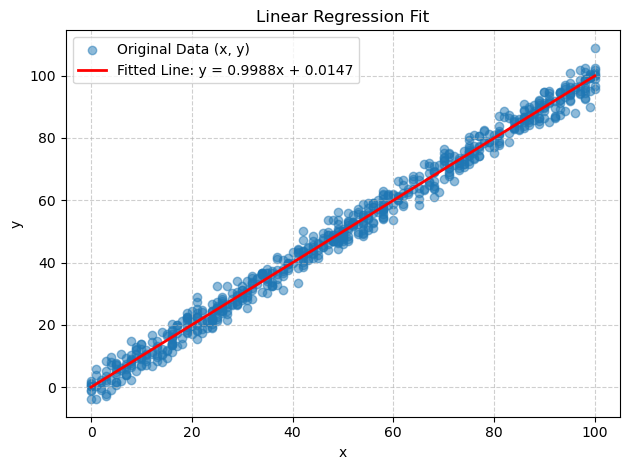

In [15]:
# --- Create Regression Line Data ---
# Create a new, sorted array of x-values for the line
x_fit = np.linspace(np.min(x), np.max(x), 100)

# Calculate the corresponding y-values using our final w and b
y_fit = w * x_fit + b

plt.scatter(x, y, alpha=0.5, label='Original Data (x, y)')

plt.plot(x_fit, y_fit, color='red', linewidth=2, label=f'Fitted Line: y = {w:.4f}x + {b:.4f}')

plt.title('Linear Regression Fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()